Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats as stats
import seaborn as sns
import math 
import matplotlib.animation as animation
import matplotlib.colors as mcol
import matplotlib.cm as cm
import time
import random
import statistics as stat
import collections
import copy 

import matplotlib.gridspec as gridspec

from os import listdir
from os.path import isfile, join
import PIL
from xml.dom import minidom
from shapely.geometry import Polygon, MultiPolygon
#from matplotlib.animation import FuncAnimation

#from descartes import PolygonPatch
#from PIL import Image
from scipy.spatial import distance
from scipy import signal
from scipy import interpolate
from scipy.stats import variation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from celluloid import Camera
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#plt.style.use('seaborn-white')

from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

%matplotlib inline
#%matplotlib qt
#%matplotlib notebook
#from google.colab import drive
#drive.mount("/content/gdrive")

In [4]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)
kwargs = dict(edgecolor = 'k', fc = 'xkcd:greyish', alpha=0.5, bins=20)

In [5]:
 ## source of this function: http://schubert.atmos.colostate.edu/~cslocum/custom_cmap.html#code
def make_cmap(colors, position=None, bit=False):

    if len(position) != len(colors):
        sys.exit('position length must be the same as colors')
    elif position[0] != 0 or position[-1] != 1:
        sys.exit('position must start with 0 and end with 1')
    
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):

        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

        cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)

    return cmap

## load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/mellow-rainbow.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

mycmap = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
print('converted successfully!')

#mycmap_r = ListedColormap(mycmap.colors[::-1])

# mycmap is matplotlib compatible object. to query color value out of it:

#print('example rgba value for data value 0 is: ' + str(mycmap(0.0)))

## load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/brown-2.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

ss_facies = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
print('converted successfully!')

## load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps//green-brown-div.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

grads = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
print('converted successfully!')

xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/blue-3.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

depths = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
print('converted successfully!')

##for velocities

xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/orange-6.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

vels = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
print('converted successfully!')


# xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/1-3wbgy.xml')
# itemlist = xmldoc.getElementsByTagName('Point')
# data_vals=[]
# color_vals=[]

# for s in itemlist:
    
#     data_vals.append(float(s.attributes['x'].value))
#     color_vals.append((float(s.attributes['r'].value),
#     float(s.attributes['g'].value),
#     float(s.attributes['b'].value)))

# ## construct the colormap

# planformcmap = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
# print('converted successfully!')



converted successfully!
converted successfully!
converted successfully!
converted successfully!
converted successfully!


In [6]:
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [7]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcol.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [8]:
ss_facies_r = reverse_colourmap(ss_facies)
timesteps_r = reverse_colourmap(mycmap)

In [27]:
nickname = 'agubh2-10km'
idf = '0hfld'
iloc = 340 #change this for the section you want to upload
modelrun = f'{nickname}-{idf}-{iloc}'

In [28]:
datamaster = np.load(f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/mainsurfs/{modelrun}.npy', allow_pickle = True)
xy_topo = copy.deepcopy(datamaster)
xy_topo = np.delete(xy_topo, 0, axis = 1)
posnew = np.arange(0, xy_topo.shape[1])

Make sure the main surfaces are loaded properly

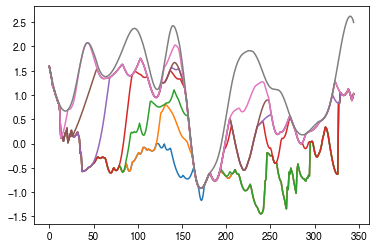

In [29]:
for i in range (0, len(xy_topo)):
    plt.plot(xy_topo[i])

Scale values to be non dimensional

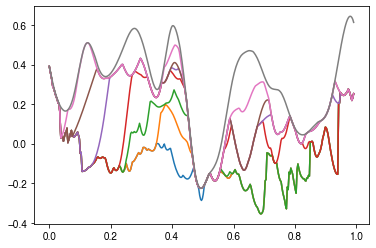

In [30]:
maxx = posnew.max()-posnew.min()
maxy = np.nanmax(xy_topo)-np.nanmin(xy_topo)
posnew = posnew/maxx
xy_topo = xy_topo/maxy

for i in range(0, len(xy_topo)):
    plt.plot(posnew, xy_topo[i])

Extract polygons for package analysis


In [31]:
## make nan border
nan_border = np.empty([len(xy_topo), 1])
nan_border[:] = np.nan

#posnew = np.arange(0, xy_topo.shape[1], dtype = float)
posnew_nb = np.insert(posnew, [0], [np.nan])
posnew_nb = np.insert(posnew_nb, -1, np.nan)

In [32]:
## make nan borders for all of it
SIC_startcrop = copy.deepcopy(xy_topo)
SIC_startcrop = np.concatenate((nan_border, SIC_startcrop, nan_border), axis = 1)

SIC_startcrop = np.delete(SIC_startcrop, 0, axis = 0)
SIC_startcrop.shape

SIC_endcrop = copy.deepcopy(xy_topo)
SIC_endcrop = np.concatenate((nan_border, SIC_endcrop, nan_border), axis = 1)

SIC_endcrop = np.delete(SIC_endcrop, -1, axis=0)
SIC_endcrop.shape

delta = SIC_startcrop-SIC_endcrop

delta[np.where(delta[:]==0)] = np.nan

In [33]:
#print(len(posnew_nb))
#l_edges = np.empty([1,]) #left edge distance measure of the wheeler fill
l_idx = np.empty([1,]) #index value of left edge
#r_edges = np.empty([1,]) #right edge of the wheeler fill
r_idx = np.empty([1,]) #index value of right edge
surf_age = np.empty([1,]) #age of each deposit for the wheeler diagram
for i in range (0, len(delta)):
    #if ~np.isnan(deposurf[i, 0]):
    #   rectangles[i, 0] = ages[i, 0] #if the left edge of the stratigraphy is a depositional surface

    for xpos in range (0, len(posnew_nb)-1):
        l_edge = np.all((np.isnan(delta[i, xpos]) and ~np.isnan(delta[i, xpos+1])))
        r_edge = np.all((~np.isnan(delta[i, xpos]) and np.isnan(delta[i, xpos+1])))
        #print(xpos, 'L', l_edge)
        #print(xpos, 'R', r_edge)
        if l_edge == True:
            #l_edges = np.append(l_edges, [posnew_nb[xpos+1]], axis = 0)
            l_idx = np.append(l_idx, [xpos], axis = 0)
            #print(posnew_nb[xpos+1], 'potato')
            surf_age = np.append(surf_age, [i], axis = 0)
        if r_edge == True:
            #print(xpos, 'tomato')
            #r_edges = np.append(r_edges, [posnew_nb[xpos-1]], axis = 0)
            r_idx = np.append(r_idx, [xpos], axis = 0)
            
#surf_age = np.append(surf_age, [i+1], axis = 0)
#print('L', l_edges)
#print('R',r_edges)
#print(dep_age)

In [34]:
l_idx = np.reshape(l_idx, [len(l_idx), 1])
#l_index = np.delete(l_index, 1)

l_idx = l_idx.astype(int)
r_idx = np.reshape(r_idx, [len(r_idx), 1])
#r_index = np.delete(r_index, 1)
r_idx = r_idx.astype(int)

#print(l_idx[:, 0], r_idx[:, 0])
surf_age = np.reshape(surf_age, [len(surf_age), 1])

print(l_idx.shape, r_idx.shape, surf_age.shape)

vertices_b = surf_age
vertices_b = np.append(vertices_b, l_idx, axis = 1)
vertices_b = np.append(vertices_b, r_idx, axis = 1)

#print(vertices)#, vertices.shape)


cent_array = np.empty([len(vertices_b), 8])
cent_array[:] = np.nan

(30, 1) (30, 1) (30, 1)


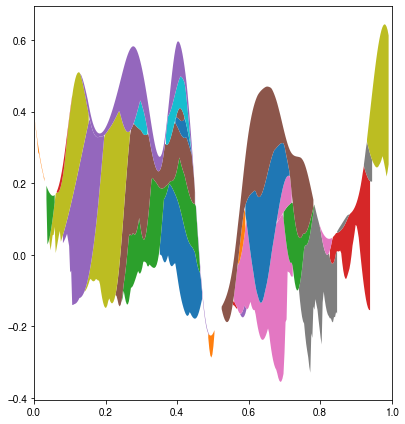

In [35]:
## Plot the filled stratigraphy, create a polygon for each, find the centroid, store the centroid and its age
testfig, ax1 = plt.subplots(1, 1, tight_layout=True, squeeze=True, figsize = (10,6))
poly_data = {}
for i in range (1, len(vertices_b)):
    time = int(vertices_b[i, 0])
    left = int(vertices_b[i, 1])
    right = int(vertices_b[i, 2])

    poly = ax1.fill_between(posnew[left:right], xy_topo[time, left:right], xy_topo[time+1, left:right])
    pverts = poly.get_paths()[0].vertices
    
    polygon = Polygon(pverts) #create a shapely polygon
    #print(polygon)
    poly_data[i] = polygon
    area = polygon.area
    bounds = polygon.bounds
    #print(type(bounds[0]))
    cent_array[i, 4] = bounds[0]
    cent_array[i, 5] = bounds[1]
    cent_array[i, 6] = bounds[2]
    cent_array[i, 7] = bounds[3]
    cent_array[i, 3] = area
    ctroid = polygon.centroid
    cent_array[i, 0] = time
    cent_array[i, 1] = ctroid.x
    cent_array[i, 2] = ctroid.y

    
    #ax1.plot(cent_array[i, 1], cent_array[i, 2], 'k*')
#ax1.set_facecolor('xkcd:midnight blue')
    

ax1.set_xlim(posnew.min(), posnew.max())
ax1.set_aspect('equal')
#ax1.set_ylim(xy_topo.min(), xy_topo.max())
#print('12', poly_data[12])
#plt.close(testfig)
#for i in range (0, num_timesteps-1):
#   plt.plot(posnew, stratinterpcub[i, :], 'k')


0.001050674567341787


Text(0.5, 0, 'deposit age (10s of min)')

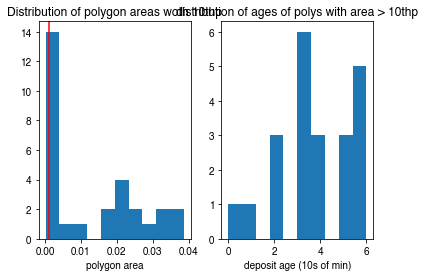

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#too_small_area = (cent_array[np.where(abs(cent_array[:, 3])<0.000001)])
#print(cent_array[:, 3])
ax1.hist(cent_array[:, 3])
ptile10 = np.nanpercentile(cent_array[:, 3], 25)

print(ptile10)
ax1.axvline(ptile10, c = 'r')

cent_wnan = copy.deepcopy(cent_array)
deletewhere = np.where(cent_array[:, 3] < ptile10)
cent_wnan[deletewhere] = np.nan

cent_nonan = cent_wnan[~np.isnan(cent_wnan).any(axis = 1)] #delete all rows in cent_wnan matrix with nan values

ax2.hist(cent_nonan[:, 0])
ax1.set_title('Distribution of polygon areas woth 10thp', fontsize = 12)
ax2.set_title('distribution of ages of polys with area > 10thp', fontsize = 12)
textstr1 = str(len(cent_array))
textstr2 = len(cent_nonan)
ax1.set_xlabel('polygon area')
ax2.set_xlabel('deposit age (10s of min)')

#plt.close(fig)

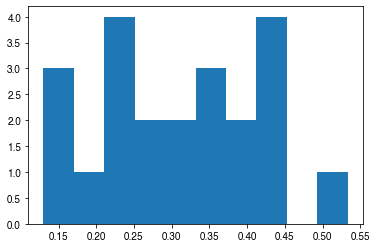

In [37]:
poly_widths = cent_nonan[:, 6]-cent_nonan[:, 4]
poly_widths = np.reshape(poly_widths, [len(poly_widths), 1])

poly_heights = cent_nonan[:, 7]-cent_nonan[:, 5]
poly_heights = np.reshape(poly_heights, [len(poly_heights), 1])
#print(poly_widths.shape)

cent_nonan = np.concatenate((cent_nonan, poly_widths, poly_heights), axis = 1)
plt.hist(cent_nonan[:, 8]/cent_nonan[:, 9]);

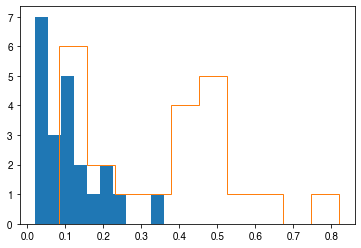

In [38]:
plt.hist(poly_widths);
plt.hist(poly_heights, histtype = 'step');